Estimating the number of mattress brands in the world is challenging due to the dynamic nature of the market and the presence of both large, well-known brands and numerous smaller, regional, or niche brands. However, you can approach this estimation using several methods:

1. **Industry Reports and Market Research:**
   - Look for industry reports from market research firms such as IBISWorld, Statista, or Grand View Research. These reports often provide insights into the number of players in the market.

2. **Online Marketplaces and Retailers:**
   - Analyze data from major online marketplaces like Amazon, Wayfair, or Alibaba. You can count the number of distinct brands listed in the mattress category. Similarly, check the number of brands available on major brick-and-mortar retailers’ websites like Walmart, Target, or specialized mattress retailers.

3. **Industry Associations:**
   - Consult industry associations like the International Sleep Products Association (ISPA). They often have data on the number of members, which can give you an idea of the number of brands.

4. **Business Directories:**
   - Use business directories such as Yellow Pages, Yelp, or global directories like Kompass to search for mattress manufacturers and brands. 

5. **Patent and Trademark Databases:**
   - Search patent and trademark databases for registered mattress brands. This can provide a list of legally recognized brands.

6. **Online Search and Market Analysis Tools:**
   - Utilize tools like SEMrush, Ahrefs, or Google Trends to analyze the online presence of mattress brands. These tools can help identify how many brands are actively marketed online.

Combining these methods, you can get a more comprehensive estimate. For example:

- **Industry Reports:** If a report states there are 200 major mattress manufacturers globally.
- **Online Marketplaces:** You identify 1000 unique brands across several major online retailers.
- **Industry Associations:** An association lists 300 members, many of whom are mattress brands.
- **Business Directories:** You find 500 unique listings for mattress manufacturers and brands.

From these sources, you could estimate:

1. **Major Brands:** ~200
2. **Online Market Brands:** ~1000 (including overlaps)
3. **Association Members:** ~300 (some overlap with above)
4. **Directory Listings:** ~500 (with overlap)

**Estimate:** 
Considering overlaps, the rough estimate might be around 1000-1500 mattress brands worldwide.

### Example Calculation:
1. **Major Brands (non-overlapping):** 200
2. **Additional Online Market Brands (excluding major):** 800
3. **Association and Directory Overlaps (conservative estimate):** 500
4. **Unique Additional Brands from Directories:** 200

**Total Estimate:**
200 (major) + 800 (additional online) + 200 (unique directory) = 1200 brands

Thus, a reasonable estimate could be around 1200 mattress brands worldwide, acknowledging that this is a rough approximation.

In [57]:
import pandas as pd
import numpy as np

current_suppliers_df = pd.read_csv('./mattress_suppliers.csv')
current_suppliers_df

,Main Ship Speed,Lead Times,Average Unit Price,# Units Sold,Gross Revenue,Total Costs,Gross Margin,Branded,Brand Awareness
0,Large Parcel,1-2 Weeks,2500,400,1000000,600000,0.40,Y,0.90
1,Small Parcel,72 Hours,291,2750,800000,565000,0.29,N,0.00
2,Large Parcel,2-3 Weeks,3333,150,500000,450000,0.10,Y,0.87
3,Small Parcel,24 Hours,179,7000,1250000,1000000,0.20,N,0.00
4,Small Parcel,2-3 Weeks,180,2750,495000,425000,0.14,N,0.00
5,Large Parcel,3-4 Weeks,12500,10,125000,85000,0.32,Y,0.08
6,Small Parcel,48 Hours,225,1575,354375,300000,0.15,N,0.00
7,Small Parcel,24 Hours,89,5000,445000,440000,0.01,N,0.00


Given an estimated 1200 mattress brands worldwide, the distribution of brand awareness is likely to be heavily skewed, with a few brands having very high awareness and the majority having low to moderate awareness. This type of distribution is often represented by a **power-law distribution** or a **Pareto distribution**. Here is what such a distribution might look like:

1. **Top Brands:**
   - A small number of brands (e.g., top 5-10%) have very high brand awareness (80-100%).
   - These would include globally recognized brands like Tempur-Pedic, Sealy, Serta, and Simmons.

2. **Mid-Tier Brands:**
   - A moderate number of brands (e.g., next 20-30%) have moderate brand awareness (30-80%).
   - These might be well-known regional brands or brands with significant online presence but less global penetration.

3. **Lower-Tier Brands:**
   - The majority of brands (e.g., remaining 60-70%) have low brand awareness (0-30%).
   - These could be smaller, regional, or niche brands that are less known to the general public.

### Example Distribution:

- **Top 5% (60 brands):** High awareness (80-100%)
- **Next 15% (180 brands):** Moderate-high awareness (50-80%)
- **Next 20% (240 brands):** Moderate awareness (30-50%)
- **Next 30% (360 brands):** Low-moderate awareness (10-30%)
- **Remaining 30% (360 brands):** Low awareness (0-10%)

This can be visualized using a power-law or log-normal distribution to reflect the skewness towards a few highly recognized brands and many less recognized ones.

### Explanation:
- **mean** and **sigma**: Adjust these parameters to get a distribution that reflects the real-world scenario where few brands have high awareness.
- **np.clip()**: Ensures that the values stay within 0-100%.
- **np.max(brand_awareness)**: Normalizes the data to fit within the 0-100 range.

This approach models the expected distribution of brand awareness, emphasizing that a small number of brands dominate in terms of awareness, while most remain relatively unknown.

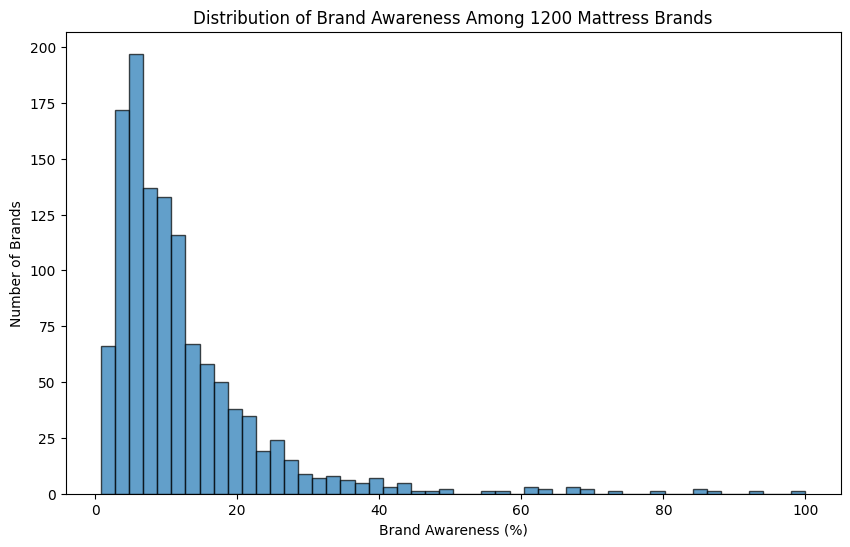

In [58]:
import matplotlib.pyplot as plt

n_brands = 1200
mean = 1.5
sigma = 0.75

brand_awareness = np.random.lognormal(mean, sigma, n_brands)
brand_awareness = np.clip(brand_awareness, 0, 100)
brand_awareness = (brand_awareness / np.max(brand_awareness)) * 100

plt.figure(figsize=(10, 6))
plt.hist(brand_awareness, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Brand Awareness Among 1200 Mattress Brands')
plt.xlabel('Brand Awareness (%)')
plt.ylabel('Number of Brands')
plt.show()

In [63]:
def generate_supplier_data(n):
    suppliers = []
    for i in range(n):
        avg_unit_price = int(np.random.exponential(scale=1000))
        avg_unit_price = int(np.clip(avg_unit_price, 75, 10000))
        units_sold = int(np.random.exponential(scale=1000))
        units_sold = int(np.clip(units_sold, 50, 10000))
        
        gross_revenue = units_sold * avg_unit_price
        cost_factor = np.random.uniform(0.75, 0.95)
        total_costs = int(gross_revenue * cost_factor)
        gross_margin = (gross_revenue - total_costs) / gross_revenue

        lead_times_choices = {
            1: "24 Hours",
            2: "48 Hours",
            3: "72 Hours",
            np.random.randint(4, 7): "Less Than 1 Week",
            np.random.randint(7, 14): "1-2 Weeks",
            np.random.randint(14, 21): "2-3 Weeks",
            np.random.randint(21, 28): "3-4 Weeks"
        }
        lead_time = np.random.choice(list(lead_times_choices.keys()))
        lead_time_category = lead_times_choices[lead_time]

        branded = np.random.choice(["Y", "N"])
        if branded == "Y":
            brand_awareness = round(np.clip(np.random.lognormal(mean=1.5, sigma=1.0), 0, 100) / 100, 2)
        else:
            brand_awareness = 0

        supplier = {
            "Main Ship Speed": np.random.choice(["Large Parcel", "Small Parcel"]),
            "Lead Times": lead_time,
            "Lead Times Category": lead_time_category,
            "Average Unit Price": avg_unit_price,
            "# Units Sold": units_sold,
            "Gross Revenue": gross_revenue,
            "Total Costs": total_costs,
            "Gross Margin": gross_margin,
            "Branded": branded,
            "Brand Awareness": brand_awareness
        }
        suppliers.append(supplier)
    return pd.DataFrame(suppliers)

example_suppliers_df = generate_supplier_data(1200)

example_suppliers_file_path = './mattress_suppliers_generated.csv'
example_suppliers_df.to_csv(example_suppliers_file_path, index=False)

In [64]:
generated_suppliers_df = pd.read_csv('./mattress_suppliers_generated.csv')
generated_suppliers_df.head()

,Main Ship Speed,Lead Times,Lead Times Category,Average Unit Price,# Units Sold,Gross Revenue,Total Costs,Gross Margin,Branded,Brand Awareness
0,Small Parcel,23,3-4 Weeks,678,5070,3437460,2704335,0.213275,Y,0.02
1,Small Parcel,1,24 Hours,133,1273,169309,148328,0.123921,N,0.00
2,Large Parcel,1,24 Hours,906,123,111438,85705,0.230918,N,0.00
3,Small Parcel,2,48 Hours,1072,50,53600,42727,0.202854,Y,0.01
4,Large Parcel,19,2-3 Weeks,2096,489,1024944,832578,0.187684,Y,0.11


From the website, we see that Wayfair has around 280 mattress brands in their filter.

In [66]:
generated_suppliers_df['Source'] = 'Potential'
current_indices = np.random.choice(generated_suppliers_df.index, 280, replace=False)
generated_suppliers_df.loc[current_indices, 'Source'] = 'Current'

generated_suppliers_df.to_csv('./suppliers_labeled.csv', index=False)

In [50]:
weights = {
    "Gross Margin": 0.4,
    "Brand Awareness": 0.1,
    "Lead Times": 0.4,
    "Cost Efficiency": 0.1
}

generated_suppliers_df["Norm Gross Margin"] = generated_suppliers_df["Gross Margin"] / generated_suppliers_df["Gross Margin"].max()
generated_suppliers_df["Norm Brand Awareness"] = generated_suppliers_df["Brand Awareness"] / generated_suppliers_df["Brand Awareness"].max()
generated_suppliers_df["Norm Lead Times"] = 1 - (generated_suppliers_df["Lead Times"] / generated_suppliers_df["Lead Times"].max())  # lower lead times are better
generated_suppliers_df["Norm Cost Efficiency"] = (generated_suppliers_df["Gross Revenue"] - generated_suppliers_df["Total Costs"]) / generated_suppliers_df["Total Costs"]
generated_suppliers_df["Norm Cost Efficiency"] = generated_suppliers_df["Norm Cost Efficiency"] / generated_suppliers_df["Norm Cost Efficiency"].max()

generated_suppliers_df["Score"] = (
    weights["Gross Margin"] * generated_suppliers_df["Norm Gross Margin"] +
    weights["Brand Awareness"] * generated_suppliers_df["Norm Brand Awareness"] +
    weights["Lead Times"] * generated_suppliers_df["Norm Lead Times"] +
    weights["Cost Efficiency"] * generated_suppliers_df["Norm Cost Efficiency"]
)

generated_suppliers_df["Rank"] = generated_suppliers_df["Score"].rank(ascending=False).astype(int)
generated_suppliers_df = generated_suppliers_df.sort_values(by="Rank")

generated_suppliers_df.head(10)

,Main Ship Speed,Lead Times,Average Unit Price,# Units Sold,Gross Revenue,Total Costs,Gross Margin,Branded,Brand Awareness,Norm Gross Margin,Norm Brand Awareness,Norm Lead Times,Norm Cost Efficiency,Score,Rank
963,0,1,327,754,246558,185565,0.247378,1,0.40,0.989709,0.470588,0.962963,0.986326,0.926760,1
553,1,1,1648,92,151616,113845,0.249123,0,0.00,0.996690,0.000000,0.962963,0.995591,0.883420,2
349,0,1,2011,94,189034,141975,0.248945,0,0.00,0.995977,0.000000,0.962963,0.994643,0.883040,3
726,0,1,4425,1942,8593350,6455069,0.248830,0,0.00,0.995517,0.000000,0.962963,0.994032,0.882795,4
114,0,1,204,187,38148,28685,0.248060,0,0.00,0.992438,0.000000,0.962963,0.989944,0.881155,5
972,1,1,1003,611,612833,462498,0.245312,0,0.00,0.981442,0.000000,0.962963,0.975409,0.875303,6
104,0,3,541,567,306747,240410,0.216260,1,0.77,0.865211,0.905882,0.888889,0.828018,0.875030,7
28,0,1,161,191,30751,23234,0.244447,0,0.00,0.977984,0.000000,0.962963,0.970861,0.873465,8
1105,0,1,75,1609,120675,91442,0.242246,1,0.03,0.969176,0.035294,0.962963,0.959322,0.872317,9
644,0,1,255,278,70890,53616,0.243673,0,0.00,0.974887,0.000000,0.962963,0.966797,0.871820,10


In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score

# Feature columns
feature_cols = ["Main Ship Speed", "Lead Times", "Average Unit Price", "# Units Sold", 
                "Gross Revenue", "Total Costs", "Gross Margin", "Branded", "Brand Awareness"]

# Target column
target_col = "Rank"

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(generated_suppliers_df[feature_cols], generated_suppliers_df[target_col], test_size=0.2, random_state=42)

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for the XGBoost model
params = {
    'objective': 'rank:pairwise',
    'eta': 0.1,
    'max_depth': 6,
    'eval_metric': 'ndcg',
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)

# Evaluate the model (example using NDCG)
# Convert rank to relevance scores for evaluation purposes (e.g., 1/rank)
y_test_relevance = 1 / y_test
preds_relevance = 1 / preds

# Reshape predictions and true labels to the shape (n_queries, n_results_per_query)
# For simplicity, assuming a single query with all items
ndcg = ndcg_score([y_test_relevance], [preds_relevance])
print(f'NDCG Score: {ndcg}')

# Optional: Combine predictions with test data for inspection
test_results = X_test.copy()
test_results["Actual Rank"] = y_test
test_results["Predicted Rank"] = preds
test_results = test_results.sort_values(by="Predicted Rank")

# Get feature importance
importance = bst.get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
print(importance_df)

NDCG Score: 0.5704261224699241
              Feature  Importance
1          Lead Times       231.0
6        Gross Margin       220.0
2  Average Unit Price        56.0
3        # Units Sold        38.0
8     Brand Awareness        31.0
4       Gross Revenue        30.0
7             Branded         8.0
0     Main Ship Speed         7.0
5         Total Costs         3.0


In [55]:
# Adjust weights based on feature importance
total_importance = sum(importance.values())
weights_adjusted = {feature: (importance.get(feature, 0) / total_importance) for feature in feature_cols}

# Ensure weights sum to 1 (optional normalization step)
total_weight = sum(weights_adjusted.values())
weights_normalized = {k: v / total_weight for k, v in weights_adjusted.items()}

print("Adjusted Weights:", weights_normalized)

Adjusted Weights: {'Main Ship Speed': 0.011217948717948718, 'Lead Times': 0.3701923076923077, 'Average Unit Price': 0.08974358974358974, '# Units Sold': 0.060897435897435896, 'Gross Revenue': 0.04807692307692308, 'Total Costs': 0.004807692307692308, 'Gross Margin': 0.3525641025641026, 'Branded': 0.01282051282051282, 'Brand Awareness': 0.049679487179487176}


### Current Search & Recommendations Strategy for the Mattress Category

Based on the summarized strategies from Wayfair’s Search & Recommendations team, here is the inferred current strategy for the mattress category:

1. **Algorithm Testing with WASP:**
   - **WASP (Wayfair Algorithm Simulator Program)**: The WASP tool is integral in testing and optimizing recommendation algorithms before they are launched. For the mattress category, WASP helps in running A/B tests to identify the best-performing algorithms, ensuring that the recommendations for mattresses are accurate and aligned with customer preferences. This process increases the success rate and speed of implementing new algorithms, allowing frequent and effective updates to mattress recommendations.

2. **Addressing the 'Cold Start' Problem with Predicted Winners:**
   - **Predicted Winners Models**: To mitigate the 'cold start' problem for new mattress products, Wayfair uses the Predicted Winners models. The Day Zero model evaluates a new mattress’s potential at launch using intrinsic features, while the Continuous Winners model refines these predictions based on early customer engagement data. This approach helps prioritize which new mattress products to invest in and promote, increasing their chances of success in the marketplace.

3. **Enhancing Search Performance with ThirdAI:**
   - **Collaboration with ThirdAI**: Wayfair has partnered with ThirdAI to improve the performance of its search and recommender systems. By implementing BOLT AI technology, Wayfair can maintain high semantic understanding of mattress-related search queries while significantly reducing latency. This ensures that customers receive relevant and fast search results when looking for mattresses, enhancing their shopping experience.

4. **Improving Query Understanding with Deep Learning:**
   - **Query Classifier**: The Query Classifier utilizes a deep learning model to predict the types of products customers are searching for based on their queries. For the mattress category, this means the system can accurately interpret complex search terms (e.g., “memory foam mattress,” “king size bed”) and display the most relevant results. This improves the relevance and accuracy of search results, helping customers find the exact mattress they need more efficiently.

### Potential Improvements for the Mattress Category

1. **Enhanced Personalization:**
   - **Customer Behavior Data**: Further integrate personalized data such as browsing history, past purchases, and customer reviews to tailor mattress recommendations even more precisely to individual preferences.
   - **Dynamic Pricing Models**: Implement machine learning models that dynamically adjust mattress prices based on demand, competition, and customer behavior to optimize sales and profitability.

2. **Advanced Semantic Search Capabilities:**
   - **Natural Language Processing (NLP)**: Enhance the query classifier with more advanced NLP techniques to better understand and respond to nuanced mattress-related queries, including those with specific preferences or requirements.
   - **Voice Search Integration**: Develop and integrate voice search capabilities, allowing customers to search for mattresses using natural language voice commands, improving accessibility and user experience.

3. **Improved Visualization and Interaction:**
   - **Augmented Reality (AR)**: Implement AR features that allow customers to visualize how different mattresses will look and fit in their bedrooms. This can increase customer confidence and reduce return rates.
   - **Interactive Filters**: Create more interactive and intuitive filtering options on the website, allowing customers to easily narrow down their mattress choices based on firmness, material, size, and other preferences.

4. **Robust Feedback Loop:**
   - **Continuous Feedback Mechanism**: Establish a robust feedback loop where customers can easily provide feedback on search results and recommendations. Use this data to continuously refine and improve the algorithms.
   - **Real-time Adjustment**: Implement systems that allow real-time adjustments to recommendations and search results based on emerging trends and immediate customer feedback.

By building on the existing strategies and incorporating these potential improvements, Wayfair can further enhance its search and recommendation systems for the mattress category, providing a superior customer experience and driving increased sales.